In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

### 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

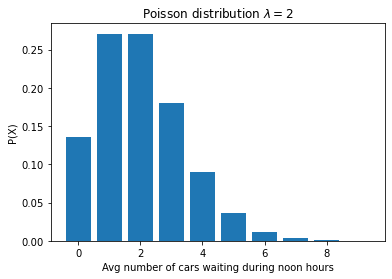

In [3]:
λ = 2

bank_cars = stats.poisson(λ)

x = np.arange(0,10)
y = bank_cars.pmf(x)

plt.bar(x,y)
plt.xlabel('Avg number of cars waiting during noon hours')
plt.ylabel('P(X)')
plt.title('Poisson distribution $λ = 2$');

#### (1a) What is the probability that no cars drive up in the noon hour?

In [7]:
p_0_cars = bank_cars.pmf(0)
p_0_cars

0.1353352832366127

ANS: 13.5%

In [97]:
rate = 1/30 #average cars per minute
minute_odds = np.random.random((10000, 60))
cars_per_hour = (minute_odds < rate).sum(axis = 1)
(cars_per_hour == 0).sum()/10000

0.1323

#### (1b) What is the probability that 3 or more cars come through the drive through?

In [6]:
p_three_plus = bank_cars.sf(2)
p_three_plus

0.32332358381693654

ANS: 32.3%

In [99]:
rate = 1/30 #average cars per minute
minute_odds = np.random.random((10000, 60))
cars_per_hour = (minute_odds < rate).sum(axis = 1)
(cars_per_hour >= 3).sum()/10000

0.3176

#### (1c) How likely is it that the drive through gets at least 1 car?

In [9]:
p_min_one = 1 - p_0_cars
p_min_one

0.8646647167633873

ANS: 86.5%

In [100]:
rate = 1/30 #average cars per minute
minute_odds = np.random.random((10000, 60))
cars_per_hour = (minute_odds < rate).sum(axis = 1)
(cars_per_hour > 0).sum()/10000

0.8667

### 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

In [14]:
mean = 3.0
stddev = 0.3

grades = stats.norm(mean, stddev)

#### (2a) What grade point average is required to be in the top 5% of the graduating class?

In [27]:
# Continuous, have the probability and want the value above: use .isf
grades.isf(.05)

3.4934560880854417

ANS: 3.5 GPA

In [102]:
gparray = np.random.normal(3, 0.3, 10000)
gparray

array([3.52619889, 3.52932197, 2.76534392, ..., 3.09845003, 2.98418991,
       3.54307314])

In [106]:
gparray.sort()
np.quantile(gparray,.95)

3.489722818418305

#### (2b) What GPA constitutes the bottom 15% of the class?


In [31]:
# Continuous, have the probability and want the value at: use .pdf
grades.ppf(.15)

2.689069983151863

ANS: 2.69 GPA

In [108]:
np.quantile(np.random.normal(3, 0.3, 10000),.15)

2.686833099135885

#### (2c) An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [35]:
scholarship_min = grades.ppf(.2)
scholarship_max = grades.ppf(.3)
scholarship_range = [scholarship_min, scholarship_max]
2.8 < scholarship_range[1] and 2.8> scholarship_range[0], scholarship_range

(True, [2.7475136299281258, 2.842679846187588])

ANS: Range between 2.75 GPA and 2.84 GPA, 2.8 would qualify.

#### (2d) If I have a GPA of 3.5, what percentile am I in?

In [38]:
# continuous, have value need percentile, percentile amount below value, use .cdf
grades.cdf(3.5)

0.9522096477271853

ANS: 95th percentile

### 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [40]:
click_rate = 0.02

stats.binom(4326, click_rate).sf(96)

0.13975823631416445

ANS: 14.0%

In [87]:
#alternate - high n & small p can use poisson approx
lmbda = 4326 * .02

stats.poisson(lmbda).sf(96)

0.14211867659283192

### 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.  What is the probability that at least one of your first 60 answers is correct?

In [46]:
guess_right = 0.01

stats.binom(60, guess_right).sf(0)

0.45284335760923855

ANS: 45.3%

### 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [142]:
student_cleans = 0.03
visitor_rate = 0.9
active_cohorts = 3
studs_per_cohort = 22

break_studs = visitor_rate * active_cohorts * studs_per_cohort

gets_cleaned = stats.binom(break_studs, student_cleans)

gets_cleaned.sf(0)

0.8362274861228873

In [145]:
gets_cleaned2 = stats.binom(2*break_studs, student_cleans)

1 - gets_cleaned2.sf(0)
gets_cleaned2.pmf(0)

0.026821436301628983

In [146]:
gets_cleaned5 = stats.binom(5*break_studs, student_cleans)

gets_cleaned5.pmf(0)

0.00011781621791055051

ANS: 46.5% it gets cleaned up any one day; 26.4% it DOES NOT get cleaned up two days in a row and 0.9% chance it goes an entire week (5 class days) without a cleaning.

### 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [52]:
mean_6 = 15
stddev_6 = 3

# 15 mins to eat = 60 mins total - 10 min wait - 2 min order - (2 * customers), max customers = 16
max_customers = 16

#Use Normal and find probability of 16 customers and below:
stats.norm(15,3).cdf(16)

0.6305586598182363

ANS: 63%

### 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [75]:
from env import get_db_url

query = '''
SELECT AVG(salary) AS avg_salary, STD(salary) AS std_salary
FROM salaries
WHERE salaries.to_date > NOW()
'''

salaries = pd.read_sql(query, get_db_url('employees'))
avg_salary = salaries.avg_salary[0]
std_salary = salaries.std_salary[0]
avg_salary, std_salary

(72012.2359, 17309.95933634675)

In [82]:
print(f'Average salary is ${avg_salary}, with a standard deviation of ${std_salary}')

Average salary is $72012.2359, with a standard deviation of $17309.95933634675


#### (7a) What percent of employees earn less than 60,000?

In [76]:
stats.norm(avg_salary, std_salary).cdf(60000)

0.2438569709201618

ANS: 24.4% of current employees earn less than \$60,000

#### (7b) What percent of employees earn more than 95,000?

In [77]:
stats.norm(avg_salary, std_salary).sf(95000)

0.09208773564924777

ANS: 9.2%

#### (7c) What percent of employees earn between 65,000 and 80,000?

In [78]:
1 - stats.norm(avg_salary, std_salary).sf(80000) - stats.norm(avg_salary, std_salary).cdf(65000)

0.3350612231883823

ANS: 33.5%

#### (7d) What do the top 5% of employees make?

In [84]:
stats.norm(avg_salary, std_salary).isf(.05)

100484.58529677246

ANS: \$100,485